# Series of Plots to Analyze Long Ariane Timeseries: Backward North

In [2]:
import arrow
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as mcb
from matplotlib.patches import Ellipse
from matplotlib import gridspec
import netCDF4 as nc
import numpy as np
import os
import pandas as pd

from salishsea_tools import viz_tools

%matplotlib inline

SUBDIR_TMPL = '{:%d%b%y}'
results_dir = '/ocean/sallen/allen/research/MEOPAR/Ariane/BackFluxes/StatsFiles/'
other_nan = ['********************']

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
startdate = []
runlength = []
startdate.append('2014-11-11')
runlength.append(20+31+365+31+29+28)
NUM = 20+31+365+31+29+28
print (NUM)

504


## Read the Results

In [4]:
rawstats = ['sn', 's0max', 's0min', 's0x', 's0x2', 's1max', 's1min', 's1x', 's1x2']
stat = {}
FraserRidge = pd.DataFrame(data=None, index=None, 
                           columns=['date', 'longitude-mean', 'longitude-std', 'depth-mean', 'depth-stdev',
                                   'salinity-mean', 'salinity-std', 'age-mean', 'age-stdev', 'flux'],
                           dtype=None, copy=False)
FraserRidgeIn = pd.DataFrame(data=None, index=None, 
                           columns=['date', 'latitude-mean', 'latitude-std', 'depth-mean', 'depth-stdev',
                                   'salinity-mean', 'salinity-std'],
                           dtype=None, copy=False)
Lost = pd.DataFrame(data=None, index=None,
                   columns=['date', 'flux'],
                   dtype=None, copy=False)
Discovery= pd.DataFrame(data=None, index=None,
                   columns=['date', 'flux'],
                   dtype=None, copy=False)
thedays = []
mean = np.zeros((5))
stdev = np.zeros((4))

In [5]:
line = 0
for segment in range(len(startdate)):
    startrundate = arrow.get(startdate[segment], 'YYYY-MM-DD')
    for nday in range(runlength[segment]):
        rundate = startrundate.replace(days=+nday)
        for stattype in rawstats:
            stat[stattype] = pd.read_csv(os.path.join(results_dir,
                                        stattype+'.'+SUBDIR_TMPL.format(rundate.datetime).lower()), 
                                        index_col=0, na_values=other_nan)
            stat[stattype].index = [x.strip() for x in stat[stattype].index]
        for i, parameter in enumerate(['depth', 'longitude', 'sal', 'age']):
            themean = stat['s1x'][parameter]/stat['sn']['sn']
            thestdev = np.sqrt(np.abs((stat['s1x2'][parameter] - 
                                     stat['s1x'][parameter]**2 / stat['sn']['sn'])
                                    / (stat['sn']['sn']-1)))
            mean[i] = themean.FraserRidge
            stdev[i] = thestdev.FraserRidge
        mean[4] = stat['sn']['flux'].FraserRidge
        lost = (stat['sn']['flux'].total - stat['sn']['flux'].meanders - mean[4] 
                - stat['sn']['flux'].Discovery)
        FraserRidge.loc[line] = [rundate, mean[1], stdev[1], mean[0], stdev[0], 
                                 mean[2], stdev[2], mean[3], stdev[3], mean[4]]
        Lost.loc[line] = [rundate, lost]
        Discovery.loc[line] = [rundate, stat['sn']['flux'].Discovery]
        for i, parameter in enumerate(['depth', 'latitude', 'sal']):
            themean = stat['s0x'][parameter]/stat['sn']['sn']
            thestdev = np.sqrt(np.abs((stat['s0x2'][parameter] - 
                                     stat['s0x'][parameter]**2 / stat['sn']['sn'])
                                    / (stat['sn']['sn']-1)))
            mean[i] = themean.FraserRidge
            stdev[i] = thestdev.FraserRidge
        FraserRidgeIn.loc[line] = [rundate, mean[1], stdev[1], mean[0], stdev[0], mean[2], stdev[2]]
        line = line + 1
FraserRidge =FraserRidge.set_index('date')
FraserRidgeIn =FraserRidgeIn.set_index('date')
Lost = Lost.set_index('date')
Discovery = Discovery.set_index('date')

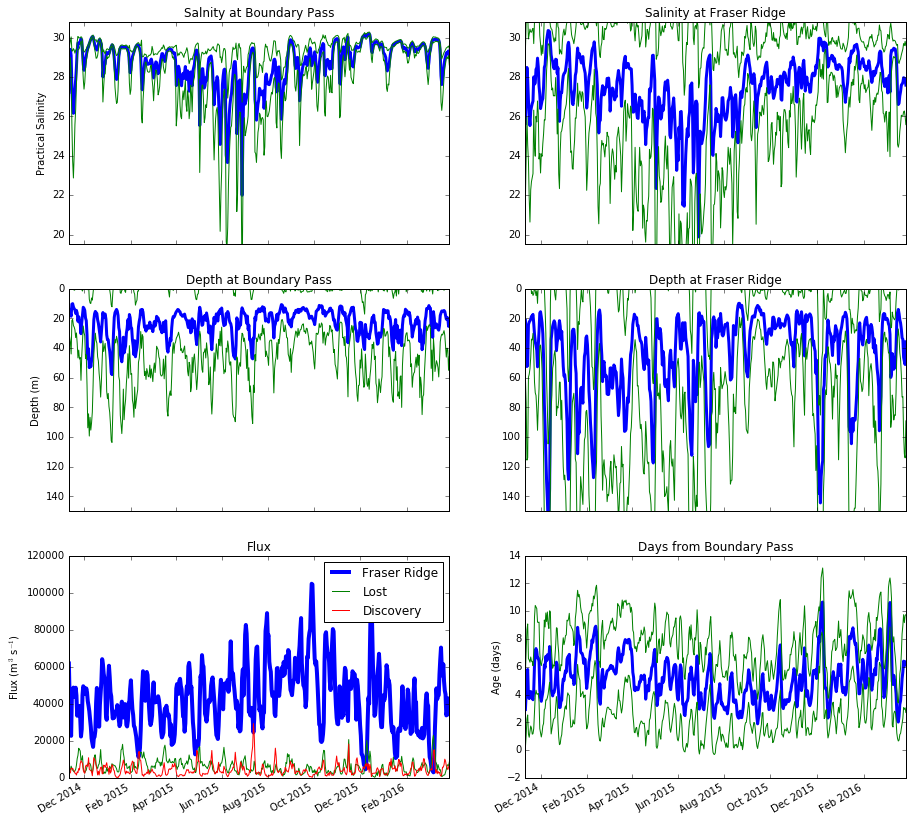

In [6]:
times = np.array([FraserRidgeIn.index[i].datetime for i in range(NUM)])
dmax=150; dmin=0
vmax=30.8; vmin=19.5
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax[0,0].plot_date(times, FraserRidgeIn['salinity-mean'],'-', linewidth=3)
ax[0,0].plot_date(times, FraserRidgeIn['salinity-mean']+FraserRidgeIn['salinity-std'],'g-')
ax[0,0].plot_date(times, FraserRidgeIn['salinity-mean']-FraserRidgeIn['salinity-std'],'g-')
ax[0,0].set_title('Salnity at Boundary Pass')
ax[0,0].set_ylim(vmin, vmax)
ax[0,0].set_ylabel('Practical Salinity')
ax[0,1].plot_date(times, FraserRidge['salinity-mean'], '-', linewidth=3)
ax[0,1].plot_date(times, FraserRidge['salinity-mean']+FraserRidge['salinity-std'], 'g-')
ax[0,1].plot_date(times, FraserRidge['salinity-mean']-FraserRidge['salinity-std'], 'g-')
ax[0,1].set_title('Salinity at Fraser Ridge')
ax[0,1].set_ylim(vmin, vmax)
ax[1,0].plot_date(times, FraserRidgeIn['depth-mean'], '-', linewidth=3)
ax[1,0].plot_date(times, FraserRidgeIn['depth-mean']+FraserRidgeIn['depth-stdev'], 'g-')
ax[1,0].plot_date(times, FraserRidgeIn['depth-mean']-FraserRidgeIn['depth-stdev'], 'g-')
ax[1,0].set_title('Depth at Boundary Pass')
ax[1,0].set_ylim(dmax, dmin)
ax[1,0].set_ylabel('Depth (m)')
ax[1,1].plot_date(times, FraserRidge['depth-mean'],'-', linewidth=3)
ax[1,1].plot_date(times, FraserRidge['depth-mean']+FraserRidge['depth-stdev'], 'g-')
ax[1,1].plot_date(times, FraserRidge['depth-mean']-FraserRidge['depth-stdev'], 'g-')
ax[1,1].set_title('Depth at Fraser Ridge')
ax[1,1].set_ylim(dmax, dmin)
ax[2,0].plot_date(times, FraserRidge['flux'],'-', linewidth=4, label='Fraser Ridge')
ax[2,0].plot_date(times, Lost['flux'], '-', label='Lost')
ax[2,0].plot_date(times, Discovery['flux'], '-', label='Discovery')
ax[2,0].legend()
ax[2,0].set_title('Flux')
ax[2,0].set_ylabel('Flux (m$^3$ s$^{-1}$)')
ax[2,1].plot_date(times, FraserRidge['age-mean']*15, '-', linewidth=3)
ax[2,1].plot_date(times, (FraserRidge['age-mean']+FraserRidge['age-stdev'])*15, 'g-')
ax[2,1].plot_date(times, (FraserRidge['age-mean']-FraserRidge['age-stdev'])*15, 'g-')
ax[2,1].set_title('Days from Boundary Pass')
ax[2,1].set_ylabel('Age (days)')
#for axi in [ax[0,0], ax[1,0], ax[2,0], ax[0,1], ax[1,1], ax[2,1]]:
#    axi.set_xlim((arrow.get('2016-02-01', 'YYYY-MM-DD').datetime, 
#                 arrow.get('2016-03-31','YYYY-MM-DD').datetime))
fig.autofmt_xdate()


In [7]:
bathy = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
depths_raw = bathy.variables['Bathymetry'][:]
lons = bathy.variables['nav_lon'][:]
lats = bathy.variables['nav_lat'][:]
depths = depths_raw.filled(fill_value=0)

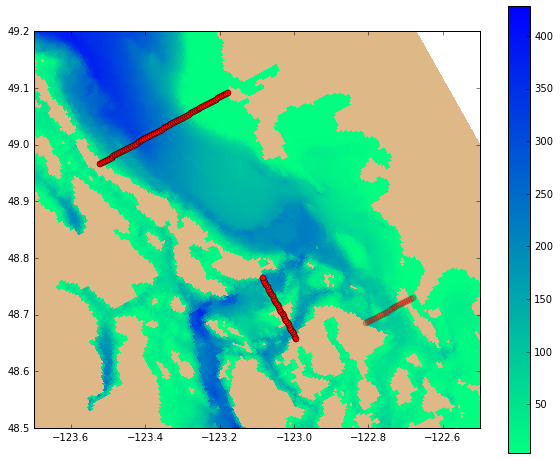

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
aspect = viz_tools.set_aspect(ax, coords='map', lats=lats)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lons[:], lats[:], depths_raw[:], cmap=cmap)
cbar = fig.colorbar(mesh)
plt.axis((-123.7, -122.5, 48.5, 49.2))
ax.plot(lons[417-1,244-1:311-1], lats[417-1,244-1:311-1], 'or')
ax.plot(lons[320-1:348-1,283-1], lats[320-1:348-1,283-1], 'or')
ax.plot(lons[312-1,314-1:339-1], lats[312-1,314-1:339-1], 'or', alpha=0.3)

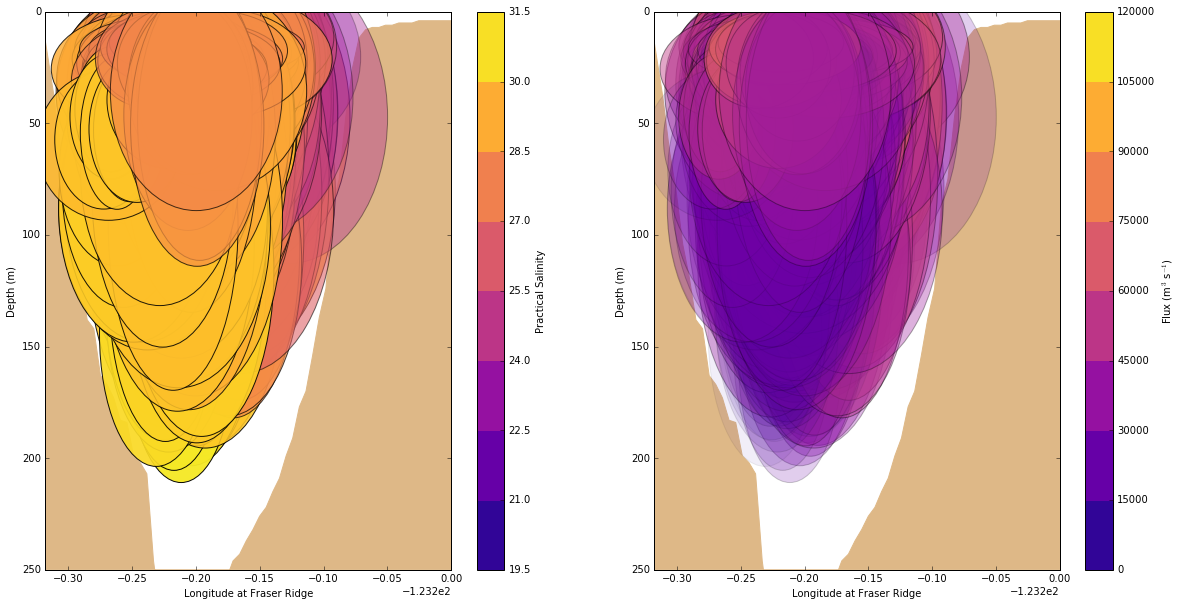

In [9]:
xlims = (-123.518, -123.2)
depthmax = 250
emin = 0; emax=11e4

cNorm = colors.Normalize(vmin=vmin, vmax=vmax)
eNorm = colors.Normalize(vmin=emin, vmax=emax)
cmap = 'plasma'
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
eMap = cmx.ScalarMappable(norm=eNorm, cmap=cmap)
Z = [[vmin,vmin],[vmax,vmax]]
strick = plt.contourf(Z, cmap=cmap)
plt.clf()
Z = [[emin,emin],[emax,emax]]
etrick = plt.contourf(Z, cmap=cmap)
plt.clf()


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].fill_between(lons[417-1,:], depthmax, depths[417-1,:], color='burlywood')
ax[1].fill_between(lons[417-1,:], depthmax, depths[417-1,:], color='burlywood')

ells = [Ellipse(xy=(FraserRidge['longitude-mean'][i], FraserRidge['depth-mean'][i]), 
                    width=2*FraserRidge['longitude-std'][i],
                    height=2*FraserRidge['depth-stdev'][i], 
                alpha=(FraserRidge['salinity-mean'][i]-vmin)/(vmax-vmin),
                facecolor=scalarMap.to_rgba(FraserRidge['salinity-mean'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[0].add_artist(e)
    

ells = [Ellipse(xy=(FraserRidge['longitude-mean'][i], FraserRidge['depth-mean'][i]), 
                    width=2*FraserRidge['longitude-std'][i],
                    height=2*FraserRidge['depth-stdev'][i], 
                alpha=(FraserRidge['flux'][i]-emin)/(emax-emin),
                facecolor=eMap.to_rgba(FraserRidge['flux'][i])
)
        for i in range(NUM)]
for i, e in enumerate(ells):
    ax[1].add_artist(e)
#    if FraserRidge['depth-mean'][i]-FraserRidge['depth-stdev'][i] > 0:
#        print (i, FraserRidge['depth-mean'][i]-FraserRidge['depth-stdev'][i])

    
ax[0].set_ylim((0, 250))
ax[0].set_xlim(xlims)
ax[0].invert_yaxis()
fig.colorbar(strick, ax=ax[0], label='Practical Salinity')

ax[1].set_ylim((0, 250))
ax[1].set_xlim(xlims)
ax[1].invert_yaxis()
fig.colorbar(etrick, ax=ax[1], label='Flux (m$^3$ s$^{-1}$)')

for ax in [ax[0], ax[1]]:
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Longitude at Fraser Ridge')

27.526757106794314
42812.17572638889 12.232050207539682
0.31799999999999784
1.575757575757576 1.5333333333333332
28.695958928014985
0.13000000000000256
5.169002829313468
1.2847813863378692
depth 44.920889374897484
depth, std 45.12897662861543
depthin 23.181438548134782
depthin, std 24.763595763666522


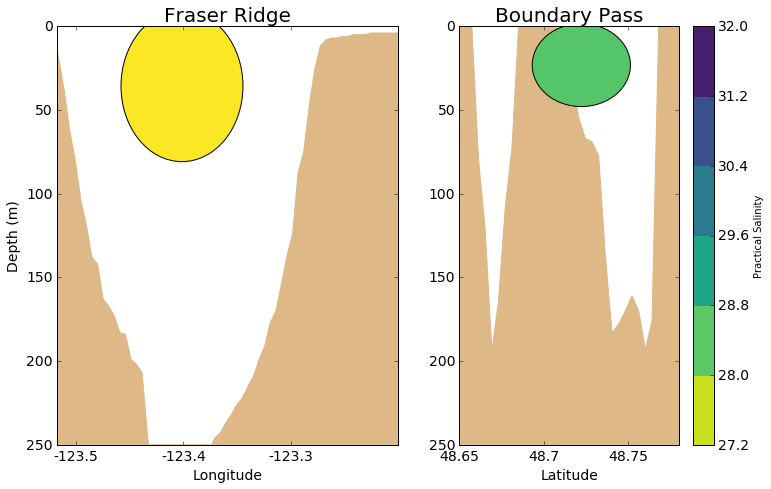

In [10]:
smax=32.; smin=27.5
cNorm = colors.Normalize(vmin=smin, vmax=smax)
cmap = 'viridis_r'
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
Z = [[smin,smin],[smax,smax]]
strick = plt.contourf(Z, cmap=cmap)
plt.clf()

ax = []
fig = plt.figure(figsize=(20*3.1/4.7*0.92, 7.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5/2.3*6.5/5.*0.95]) 
ax.append(plt.subplot(gs[0]))
ax.append(plt.subplot(gs[1]))

ax[0].fill_between(lons[417-1,:], depthmax, depths[417-1,:], color='burlywood')
ells = Ellipse(xy=(np.mean(FraserRidge['longitude-mean']), np.mean(FraserRidge['depth-mean'][i])), 
                    width=2*np.mean(FraserRidge['longitude-std']),
                    height=2*np.mean(FraserRidge['depth-stdev']), 
                    facecolor=scalarMap.to_rgba(np.mean(FraserRidge['salinity-mean'])))
ax[0].add_artist(ells)
print (np.mean(FraserRidge['salinity-mean']))
print (np.mean(FraserRidge['flux']), np.mean(FraserRidge['flux'])/3500.)


ax[0].set_ylim((0, 250))
xlims = (-123.518, -123.2)
print (xlims[1]-xlims[0])
print (5.2/3.3, 2.3/1.5)

ax[0].set_xlim(xlims)
ax[0].invert_yaxis()

ax[1].fill_between(lats[:,283-1], depthmax, depths[:,283-1], color='burlywood')
ells = Ellipse(xy=(np.mean(FraserRidgeIn['latitude-mean']), np.mean(FraserRidgeIn['depth-mean'])), 
                    width=2*np.mean(FraserRidgeIn['latitude-std']),
                    height=2*np.mean(FraserRidgeIn['depth-stdev']),
                facecolor = scalarMap.to_rgba(np.mean(FraserRidgeIn['salinity-mean'])))
ax[1].add_artist(ells)
print (np.mean(FraserRidgeIn['salinity-mean']))


cbar = fig.colorbar(strick, ax=ax[1], label='Practical Salinity')
xlims = (48.65, 48.78)
print (xlims[1]-xlims[0])

ax[1].set_ylim((0, 250))
ax[1].set_xlim(xlims)
ax[1].invert_yaxis()

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
ax[1].set_xlabel('Latitude', fontsize=14)
ax[0].set_xlabel('Longitude', fontsize=14)
ax[0].set_xticks([-123.5, -123.4, -123.3])
ax[0].set_xticklabels(['-123.5', '-123.4', '-123.3'])
ax[0].set_ylabel('Depth (m)', fontsize=14)
ax[0].set_title('Fraser Ridge', fontsize=20)
ax[1].set_title('Boundary Pass', fontsize=20)
ax[1].set_xticks([48.65, 48.7, 48.75])
ax[1].set_xticklabels(['48.65', '48.7', '48.75'])

print (np.mean(FraserRidge['age-mean'])*15.)
print (np.mean(Discovery['flux'])/3500.)

print ('depth', np.mean(FraserRidge['depth-mean']))
print ('depth, std', np.mean(FraserRidge['depth-stdev']))

print ('depthin', np.mean(FraserRidgeIn['depth-mean']))
print ('depthin, std', np.mean(FraserRidgeIn['depth-stdev']))

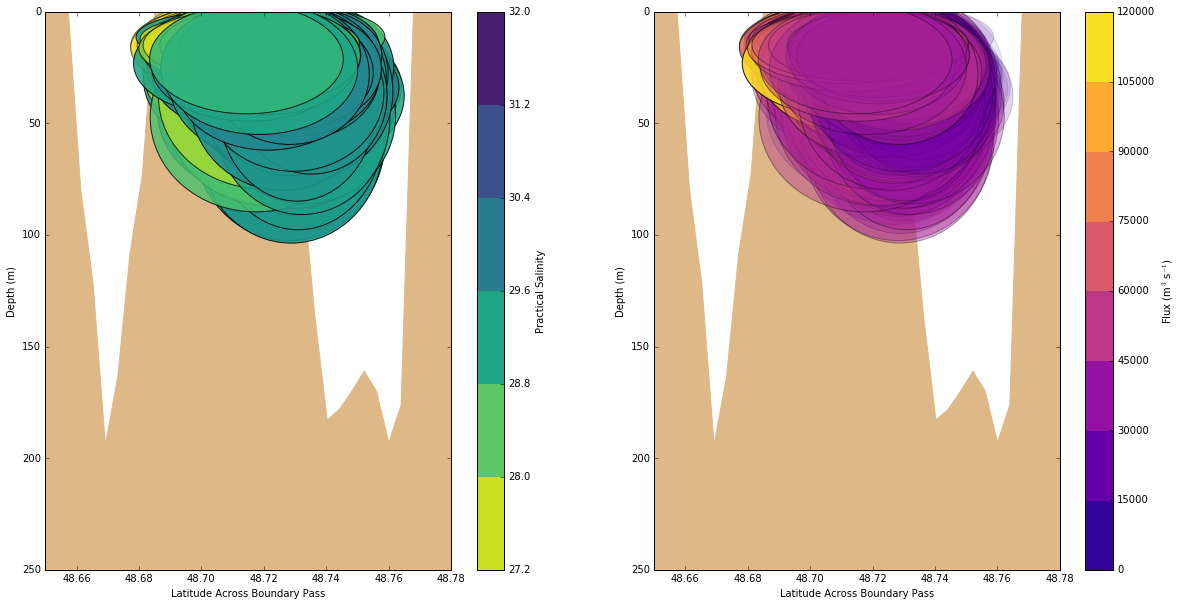

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
xlims = (48.65, 48.78)
depthmax = 250
ax[0].fill_between(lats[:,283-1], depthmax, depths[:,283-1], color='burlywood')
ax[1].fill_between(lats[:,283-1], depthmax, depths[:,283-1], color='burlywood')


ells = [Ellipse(xy=(FraserRidgeIn['latitude-mean'][i], FraserRidgeIn['depth-mean'][i]), 
                    width=2*FraserRidgeIn['latitude-std'][i],
                    height=2*FraserRidgeIn['depth-stdev'][i],
                alpha=(FraserRidgeIn['salinity-mean'][i]-vmin)/(vmax-vmin),
                facecolor = scalarMap.to_rgba(FraserRidgeIn['salinity-mean'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[0].add_artist(e)
    
ells = [Ellipse(xy=(FraserRidgeIn['latitude-mean'][i], FraserRidgeIn['depth-mean'][i]), 
                    width=2*FraserRidgeIn['latitude-std'][i],
                    height=2*FraserRidgeIn['depth-stdev'][i], 
                alpha=(FraserRidge['flux'][i]-emin)/(emax-emin),
                facecolor=eMap.to_rgba(FraserRidge['flux'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[1].add_artist(e)

    
ax[0].set_ylim((0, 250))
ax[0].set_xlim(xlims)
ax[0].invert_yaxis()
fig.colorbar(strick, ax=ax[0], label='Practical Salinity')

ax[1].set_ylim((0, 250))
ax[1].set_xlim(xlims)
ax[1].invert_yaxis()
fig.colorbar(etrick, ax=ax[1], label='Flux (m$^3$ s$^{-1}$)')

for ax in [ax[0], ax[1]]:
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Latitude Across Boundary Pass')

(0.0, 1.0, 0.0, 1.0)

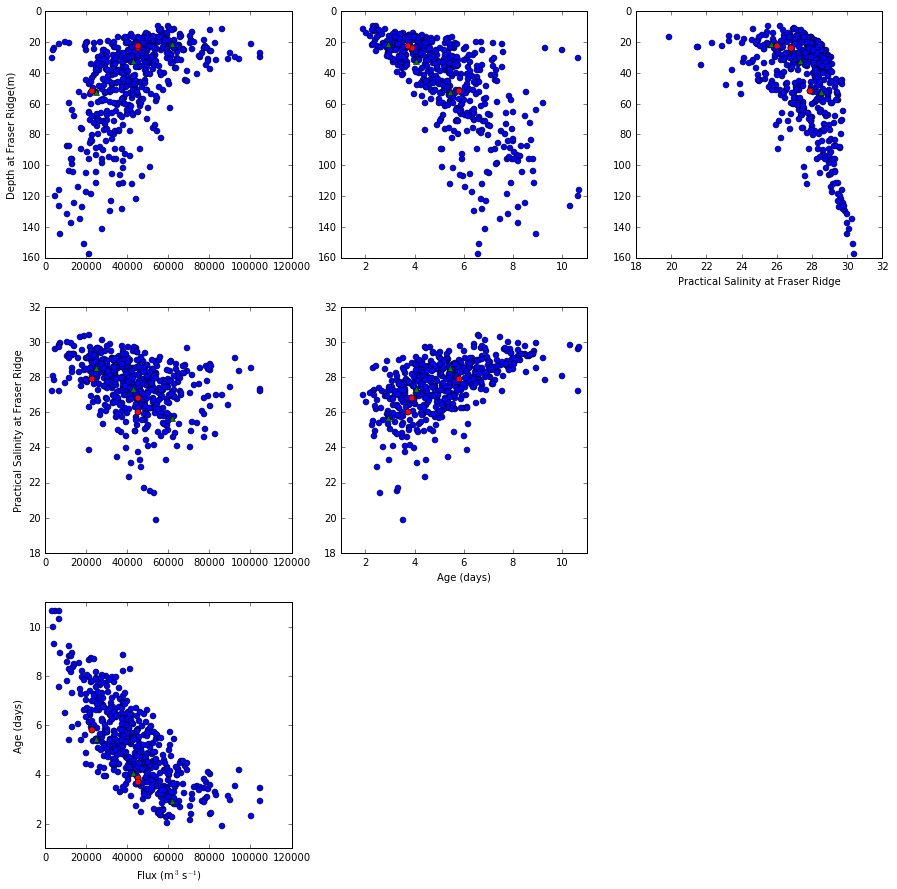

In [12]:
st=0; et=-1
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ax[0,0].plot(FraserRidge['flux'][st:et], FraserRidge['depth-mean'][st:et], 'o')
ax[0,0].plot(FraserRidge['flux'][:3], FraserRidge['depth-mean'][:3], 'g^')
ax[0,0].plot(FraserRidge['flux'][3:6], FraserRidge['depth-mean'][3:6], 'ro')
ax[0,0].invert_yaxis()
ax[0,0].set_ylabel('Depth at Fraser Ridge(m)')

ax[1,0].plot(FraserRidge['flux'][st:et], FraserRidge['salinity-mean'][st:et], 'o')
ax[1,0].plot(FraserRidge['flux'][:3], FraserRidge['salinity-mean'][:3], 'g^')
ax[1,0].plot(FraserRidge['flux'][3:6], FraserRidge['salinity-mean'][3:6], 'ro')
ax[2,0].set_xlabel('Flux (m$^3$ s$^{-1}$)')
ax[1,0].set_ylabel('Practical Salinity at Fraser Ridge')

ax[0,1].plot(FraserRidge['age-mean'][st:et]*15, FraserRidge['depth-mean'][st:et], 'o')
ax[0,1].plot(FraserRidge['age-mean'][:3]*15, FraserRidge['depth-mean'][:3], 'g^')
ax[0,1].plot(FraserRidge['age-mean'][3:6]*15, FraserRidge['depth-mean'][3:6], 'ro')
ax[0,1].invert_yaxis()

ax[1,1].plot(FraserRidge['age-mean'][st:et]*15, FraserRidge['salinity-mean'][st:et], 'o')
ax[1,1].plot(FraserRidge['age-mean'][:3]*15, FraserRidge['salinity-mean'][:3], 'g^')
ax[1,1].plot(FraserRidge['age-mean'][3:6]*15, FraserRidge['salinity-mean'][3:6], 'ro')
ax[1,1].set_xlabel('Age (days)')

ax[0,2].plot(FraserRidge['salinity-mean'][st:et], FraserRidge['depth-mean'][st:et], 'o')
ax[0,2].plot(FraserRidge['salinity-mean'][:3], FraserRidge['depth-mean'][:3], 'g^')
ax[0,2].plot(FraserRidge['salinity-mean'][3:6], FraserRidge['depth-mean'][3:6], 'ro')
ax[0,2].set_xlabel('Practical Salinity at Fraser Ridge')
ax[0,2].invert_yaxis()

ax[2,0].plot(FraserRidge['flux'][st:et], FraserRidge['age-mean'][st:et]*15, 'o')
ax[2,0].plot(FraserRidge['flux'][:3], FraserRidge['age-mean'][:3]*15, 'g^')
ax[2,0].plot(FraserRidge['flux'][3:6], FraserRidge['age-mean'][3:6]*15, 'ro')
ax[2,0].set_ylabel('Age (days)')


ax[1,2].axis('off')
ax[2,1].axis('off')
ax[2,2].axis('off')

## 